## Clustering Birthdays
The algorithm I chose to use was K-Means.

It's easy to use and comes built-in with the ```sklearn``` toolkit which I already know a bit.

### Step One - Import the Required Libraries
Easy as pie

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
from sklearn.cluster import KMeans
%matplotlib inline

### Step Two - Load the Data
We're going to use Pandas to read the data from a CSV

In [2]:
# Loading Dataset
df = pd.read_csv("Birthdays.csv")
df.head()

,Name,Birthday
0,Blanca,1/5/2016
1,Jaume,3/1/2016
2,Erik,4/5/2016
3,Sira,4/23/2016
4,Roc,5/1/2016


### Step Three - Process the data
My first thought was to use the day of the year as the only dimension to use

In [3]:
# Day of the year
toDayOfYear = lambda t: pd.to_datetime(t).timetuple().tm_yday
daysOfYear  = np.array([toDayOfYear(xi) for xi in df.Birthday])
print(daysOfYear)

[  5  61  96 114 122 138 161 168 237 264 335 341 347 347 362 363 364]


And while this sounds good my, very clever, wife pointed at me that this is not linear because we're going to be seeing the same kids every year for the following years so my approach wouldn't work.

![Facepalm](https://www.alfonsfoubert.com/wp-content/uploads/2019/11/facepalm.jpg "Facepalm")

After crying for a while I decided then to use polar coordinates to create a circle.

First we would transform the days into degrees, then I would calculate the x and y with the simple equations:
$$x=r\cos(\alpha)$$
$$y=r\sin(\alpha)$$

Let's see how it looks...

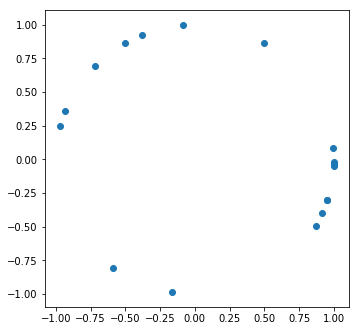

In [4]:
# Normalize to Degrees
normalize = lambda t: (360 * t) / 365

# Coordinates
coords = lambda t: [math.cos(t), math.sin(t)]

# Transformation
X = np.array([coords(math.radians(normalize(xi))) for xi in daysOfYear])

# Plot Chart
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])

**Great!**
We now have a circular distribution we can work with, so let's move on.

### Step Four - Create the Algorithm

We'll use the K-Means algorithm and will decide to start by saying we're going to have 5 birthday parties every year. That's the number of clusters you want the algorithm to use.

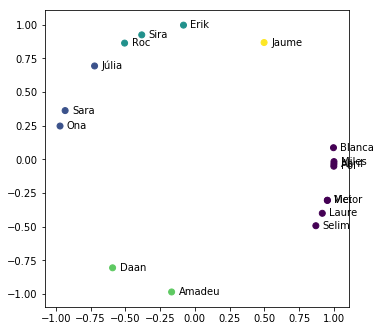

In [5]:
# Amount of Birthday Parties we want to have
birthdayParties = 5

# K-Means Algorithm
kmeans = KMeans(n_clusters=birthdayParties)
y_pred = kmeans.fit_predict(X)

# Plot Chart
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Print Names
for i, txt in enumerate(df.Name):
    plt.annotate(txt, (X[i][0]+0.05, X[i][1]-0.02))

**And ... Voila!**

We got it, the last item on the list would be to print the best days of the year to have the birthday parties which in our case are the found centroids.

Before printing them however, we need to undo all the transformations we've done before so that instead of having a pair of x and y coordinates, we have a date. For this we'll use the equation:
$$\alpha=atan2(y,x)$$

In [6]:
# Coordinates to degrees
anglify = lambda t: math.degrees(math.atan2(t[1], t[0]))

# Denormalize
denormalize = lambda t: 365*t/360

# Day of Year to Actual Date
toDay = lambda t: datetime(datetime.today().year + 1, 1, 1) + timedelta(round(t) - 1)

# Inverse Transformation
bestDays = np.array([toDay(denormalize(anglify(xi))) for xi in kmeans.cluster_centers_])

# Print the result
print("Best Days:")
i = 0
for day in bestDays:
    print("  - " + day.strftime('%d %b') + ":")
    j = 0
    for kid in y_pred:
        if kid == i:
            print("    * " + df.Name[j])
        j = j+1
    i = i+1

Best Days:
  - 20 Dec:
    * Blanca
    * Selim
    * Laure
    * Mei
    * Victor
    * Pol
    * Abril
    * Miles
  - 04 Jun:
    * Júlia
    * Sara
    * Ona
  - 20 Apr:
    * Erik
    * Sira
    * Roc
  - 07 Sep:
    * Daan
    * Amadeu
  - 01 Mar:
    * Jaume


There you have it!